In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

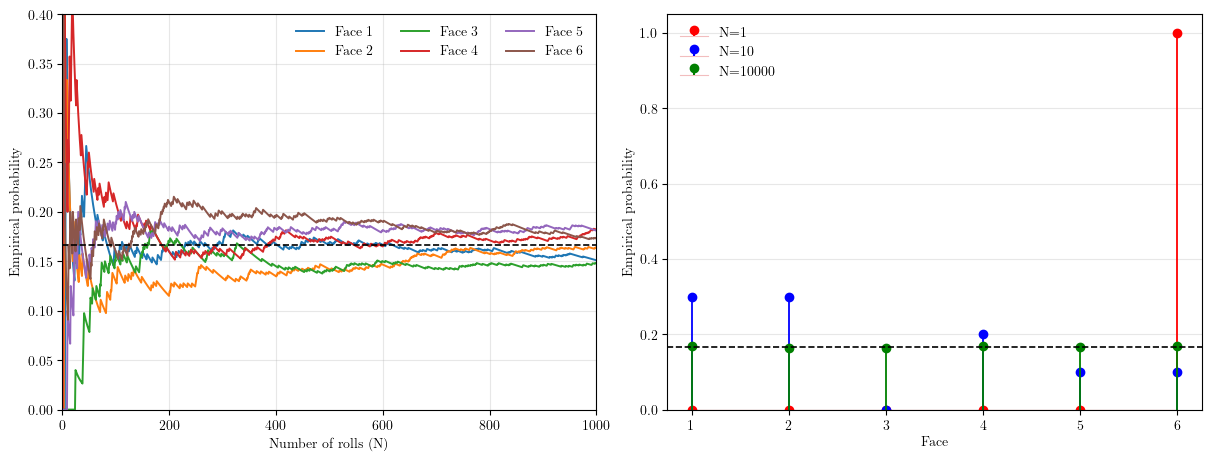

In [ ]:
N = 100000
seed = 0

rng = np.random.default_rng(seed)
rolls = rng.integers(1, 7, size=N)
ns = np.arange(1, N + 1)

probs = np.empty((6, N), dtype=float)
for face in range(1, 7):
    # indicator 1 if roll == face, else 0
    indicators = (rolls == face).astype(int)
    cums = np.cumsum(indicators)
    probs[face - 1] = cums / ns

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4.5), constrained_layout=True)

for i in range(6):
    ax0.plot(ns, probs[i], linewidth=1.4, label=f"Face {i+1}")
ax0.axhline(1/6, linestyle="--", linewidth=1.2, color="black")
ax0.set_xlabel("Number of rolls (N)")
ax0.set_ylabel("Empirical probability")
# ax0.set_title("Convergence of empirical probabilities")
ax0.set_ylim(0, .4)
ax0.grid(True, alpha=0.3)
ax0.set_xlim(0, 1000)
ax0.legend(ncols=3, frameon=False)

faces = np.arange(1, 7)

times = [1, 10, 10000]
colors = ["red", "blue", "green"]
for i, t in enumerate(times):
    counts_t = np.array([(rolls[:t] == f).sum() for f in faces])
    p_t = counts_t / t
    markerline, stemlines, baseline = ax1.stem(faces, p_t, label=f"N={t}", linefmt=colors[i])
    markerline.set_markersize(6)
    stemlines.set_linewidth(1.3)
    baseline.set_linewidth(0.8)
    baseline.set_alpha(0.3)

ax1.axhline(1/6, linestyle="--", linewidth=1.2, color="black")
ax1.set_xticks(faces)
ax1.set_ylim(0, max(0.5, ax1.get_ylim()[1]))
ax1.set_ylabel("Empirical probability")
ax1.set_xlabel("Face")
# ax1.set_title("Distribution snapshots (overlaid stems)")
ax1.grid(True, axis="y", alpha=0.3)
ax1.legend(frameon=False)


plt.savefig("../../../figs/probability/empirical_distribution.pdf", bbox_inches="tight", transparent=True)
plt.show()